<a href="https://colab.research.google.com/github/yaman9675/NYC-Taxi-Trip-Time-Prediction/blob/main/Yaman_NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

#<b>Import libraries

In [ ]:
!pip install klib

In [ ]:
import klib 
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.metrics import accuracy_score, auc
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

#<b>Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#<b>Import Dataset

In [ ]:
# Importing the dataset
nyc_taxi = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone Project/NYC Taxi Trip Time Prediction/NYC Taxi Data.csv')

##<b>Using klib Python library for importing, cleaning, analyzing and preprocessing data.

GridSpec(6, 4)

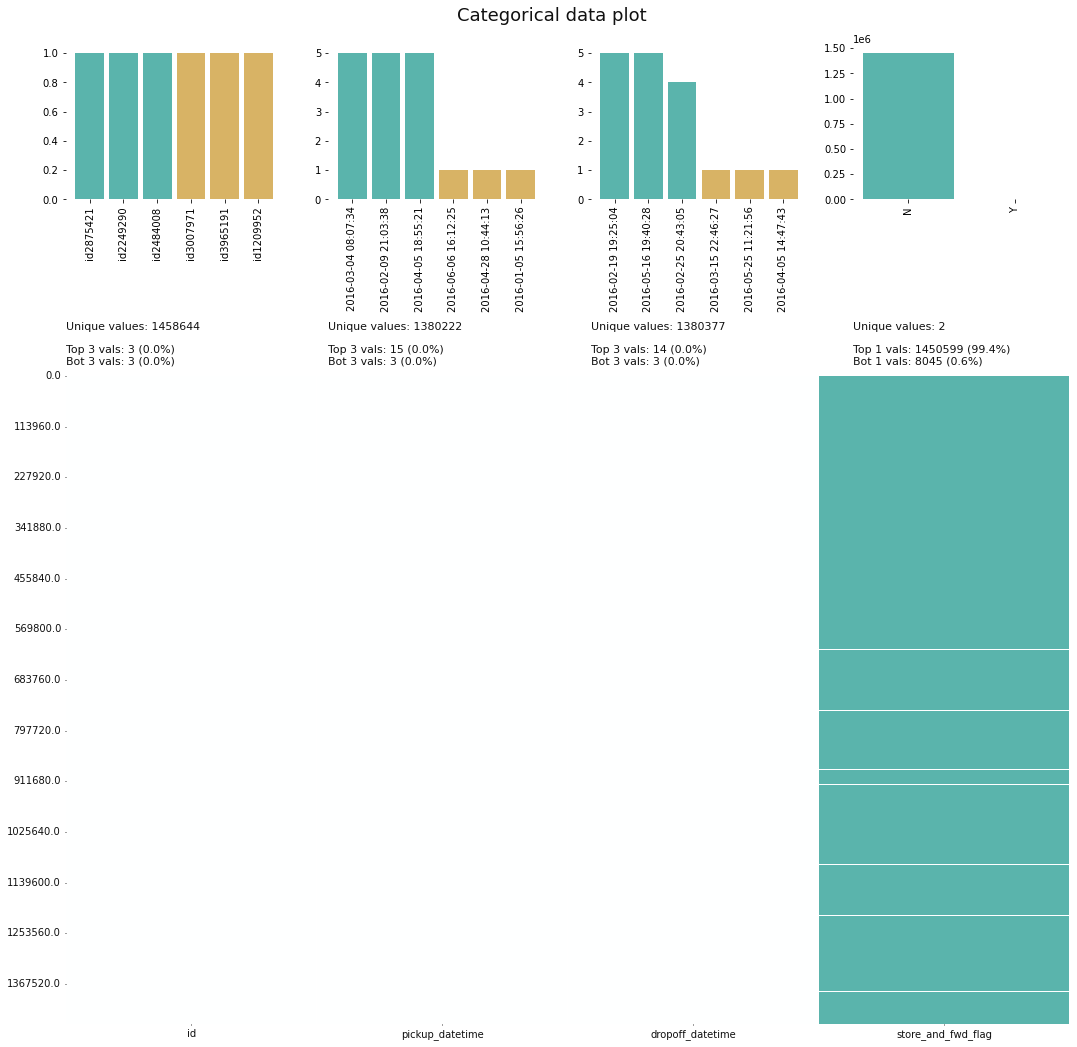

In [ ]:
#Categorical Data Plot
klib.cat_plot(nyc_taxi)

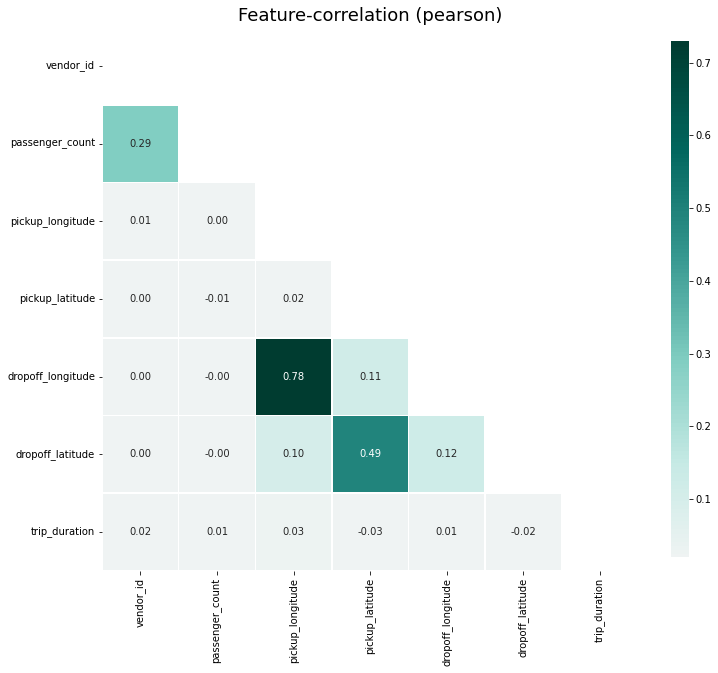

In [ ]:
#correlation graph among columns
klib.corr_plot(nyc_taxi)

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


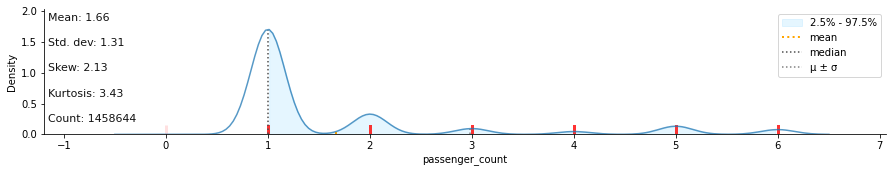

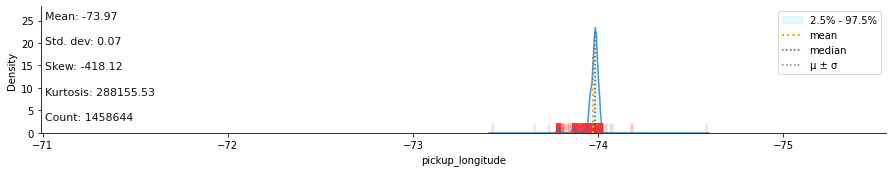

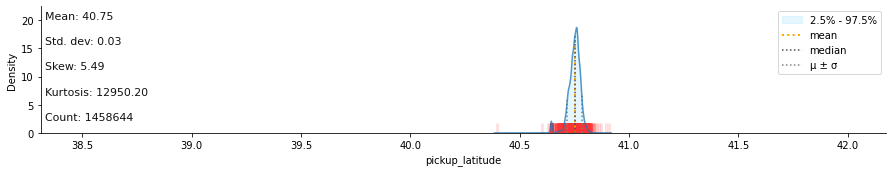

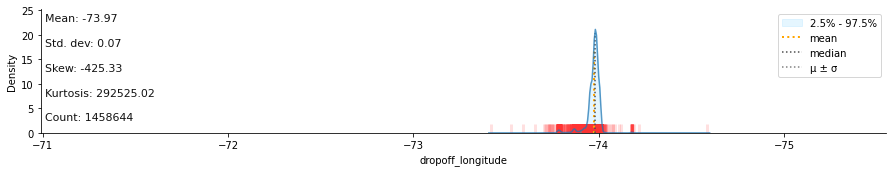

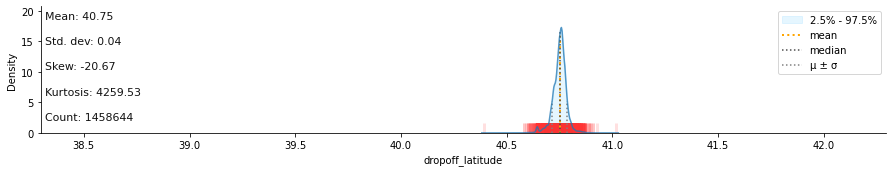

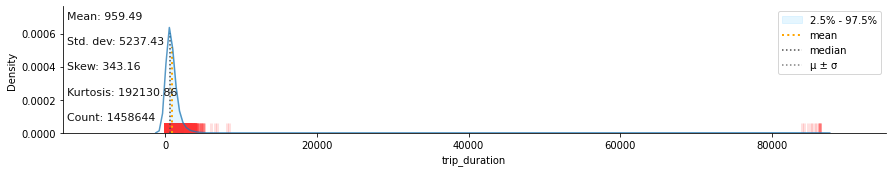

In [ ]:
# default representation of a distribution plot, other settings include fill_range, histogram, ...
klib.dist_plot(nyc_taxi)

In [ ]:
##Check any NULL records present in our dataset.
klib.missingval_plot(nyc_taxi)

No missing values found in the dataset.


There is no NULL values in our dataset.

#<b>Data Overview

In [ ]:
#View our data set.
nyc_taxi.head(4)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429


In [ ]:
#Checking number of rows and columns in our dataset.
print("Number of rows is: ", nyc_taxi.shape[0])
print("Number of columns is: ", nyc_taxi.shape[1])

Number of rows is:  1458644
Number of columns is:  11


In [ ]:
#Let's look at each feture in our dataset.
nyc_taxi.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [ ]:
#Check the number of unique id in our dataset
print(f'We have {nyc_taxi.id.nunique()} unique id in our dataset')

We have 1458644 unique id in our dataset


In [ ]:
#Let us now look at the datatypes of all features.
nyc_taxi.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [ ]:
#We have pickup_datetime, dropoff_datetime of the type 'object'. Convert it into type 'datetime'.
nyc_taxi['pickup_datetime'] = pd.to_datetime(nyc_taxi['pickup_datetime'])
nyc_taxi['dropoff_datetime'] = pd.to_datetime(nyc_taxi['dropoff_datetime'])

In [ ]:
nyc_taxi.head(2)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663


In [ ]:
nyc_taxi.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


#**Feature Creation**
Now, let us extract and create new features from this datetime features we just created.

In [ ]:
#It will contain the day number instead of characters with Monday=0 and Sunday=6.
nyc_taxi['pickup_weekday']=nyc_taxi['pickup_datetime'].dt.day_name()

#It will contain the day number instead of characters with Monday=0 and Sunday=6.
nyc_taxi['dropoff_weekday']=nyc_taxi['dropoff_datetime'].dt.day_name()

#It will convert weekday into number start at Monday=0 and end at Sunday=6.
nyc_taxi['pickup_weekday_num']=nyc_taxi['pickup_datetime'].dt.weekday

#Extract hour only from pickup_datetime.
nyc_taxi['pickup_hour']=nyc_taxi['pickup_datetime'].dt.hour

#Extract month in number only from pickup_datetime with January=1
nyc_taxi['month']=nyc_taxi['pickup_datetime'].dt.month

We have created the following features:

pickup_weekday which will contain the name of the day on which the ride was taken.
pickup_weekday_num which will contain the day number instead of characters with Monday=0 and Sunday=6.

pickup_hour with an hour of the day in the 24-hour format.

pickup_month with month number with January=1 and December=12.
We saw in our dataset that we have coordinates in the form of longitude and latitude for pickup and dropoff. But, we can’t really gather any insights or draw conclusions from that. So, the most obvious feature that we can extract from this is distance. Let us do that.

Importing the library which lets us calculate distance from geographical coordinates.

In [ ]:
from geopy.distance import great_circle

In [ ]:
#Creating the function for calculating distance between pickup and dropoff
def cal_distance(pickup_lat,pickup_long,dropoff_lat,dropoff_long):
 
 start_coordinates=(pickup_lat,pickup_long)
 stop_coordinates=(dropoff_lat,dropoff_long)
 
 return great_circle(start_coordinates,stop_coordinates).km

In [ ]:
#Applying the function to our dataset and creating the feature ‘distance’.
nyc_taxi['distance'] = nyc_taxi.apply(lambda x: cal_distance(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude'] ), axis=1)

Calculate Speed in km/h for further insights

In [ ]:
nyc_taxi['speed'] = (nyc_taxi.distance*3600/(nyc_taxi.trip_duration))

In [ ]:
#Let us check the data type of all features.
nyc_taxi.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
pickup_weekday                object
dropoff_weekday               object
pickup_weekday_num             int64
pickup_hour                    int64
month                          int64
distance                     float64
speed                        float64
dtype: object

Next, we have defined a function that lets us determine what time of the day the ride was taken.

We have created four parts of time:-

1.**Morning** (from 6:00 am to 11:59 pm),

2.**Afternoon** (from 12 noon to 3:59 pm),

3.**Evening** (from 4:00 pm to 9:59 pm), and

4.**Late Night** (from 10:00 pm to 5:59 am)

In [ ]:
#Dividing 24 hours into four parts
def time_of_day(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'

In [ ]:
#Now let us apply this function and create new columns in the dataset.
nyc_taxi['pickup_timeofday'] = nyc_taxi['pickup_hour'].apply(time_of_day)

In [ ]:
nyc_taxi.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_weekday,dropoff_weekday,pickup_weekday_num,pickup_hour,month,distance,speed,pickup_timeofday
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday,0,17,3,1.498523,11.856445,Evening
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday,6,0,6,1.805510,9.803673,Late night
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,Tuesday,1,11,1,6.385108,10.822216,Morning
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,Wednesday,2,19,4,1.485501,12.465739,Evening
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,Saturday,5,13,3,1.188590,9.836608,Afternoon


Now our dataset is complete for the further analysis before we train our model with optimal variables.

#**Univariate Analysis**
The univariate analysis involves studying patterns of all variables individually.

**Target Variable**

Let us start with the target varibale i.e trip duration.

In [ ]:
for i in range(0,100,10):
  duration= nyc_taxi['trip_duration'].values
  duration= np.sort(duration, axis= None)
  print("{} percentile value is {}".format(i, duration[int(len(duration)*(float(i)/100))]))
print("100 percentile value is ",duration[-1])

0 percentile value is 1
10 percentile value is 245
20 percentile value is 348
30 percentile value is 446
40 percentile value is 548
50 percentile value is 662
60 percentile value is 798
70 percentile value is 968
80 percentile value is 1208
90 percentile value is 1634
100 percentile value is  3526282


In [ ]:
for i in range(90,100):
  duration= nyc_taxi['trip_duration'].values
  duration= np.sort(duration, axis= None)
  print("{} percentile value is {}".format(i, duration[int(len(duration)*(float(i)/100))]))
print("100 percentile value is ",duration[-1])

90 percentile value is 1634
91 percentile value is 1703
92 percentile value is 1780
93 percentile value is 1869
94 percentile value is 1975
95 percentile value is 2104
96 percentile value is 2273
97 percentile value is 2497
98 percentile value is 2829
99 percentile value is 3440
100 percentile value is  3526282


In [ ]:
# Setting Trip duration upper limit
nyc_taxi = nyc_taxi[nyc_taxi.trip_duration <= 3400]

#Removing 0 passenger 
nyc_taxi = nyc_taxi[nyc_taxi['passenger_count'] != 0]

#Removing 0 distance 
nyc_taxi = nyc_taxi[nyc_taxi['distance'] >= 0.05]

In [ ]:
nyc_taxi.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_weekday_num,pickup_hour,month,distance,speed
count,1.432106e+06,1.432106e+06,1.432106e+06,1.432106e+06,1.432106e+06,1.432106e+06,1.432106e+06,1.432106e+06,1.432106e+06,1.432106e+06,1.432106e+06,1.432106e+06
mean,1.534206e+00,1.664090e+00,-7.397445e+01,4.075140e+01,-7.397388e+01,4.075214e+01,8.098682e+02,3.052897e+00,1.360896e+01,3.512225e+00,3.332054e+00,1.449209e+01
std,4.988288e-01,1.313971e+00,3.583344e-02,2.752729e-02,3.426769e-02,3.198368e-02,5.720904e+02,1.955559e+00,6.413638e+00,1.680352e+00,3.663605e+00,7.772531e+00
min,1.000000e+00,1.000000e+00,-7.524149e+01,3.531031e+01,-7.557015e+01,3.517355e+01,3.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,5.000602e-02,5.938298e-02
25%,1.000000e+00,1.000000e+00,-7.399192e+01,4.073768e+01,-7.399134e+01,4.073625e+01,3.980000e+02,1.000000e+00,9.000000e+00,2.000000e+00,1.242416e+00,9.206223e+00
50%,2.000000e+00,1.000000e+00,-7.398185e+01,4.075427e+01,-7.397980e+01,4.075464e+01,6.590000e+02,3.000000e+00,1.400000e+01,4.000000e+00,2.091372e+00,1.283132e+01
75%,2.000000e+00,2.000000e+00,-7.396777e+01,4.076840e+01,-7.396328e+01,4.076992e+01,1.060000e+03,5.000000e+00,1.900000e+01,5.000000e+00,3.818789e+00,1.787356e+01
max,2.000000e+00,6.000000e+00,-7.207433e+01,4.169680e+01,-7.202241e+01,4.169335e+01,3.400000e+03,6.000000e+00,2.300000e+01,6.000000e+00,6.237589e+01,1.971294e+02


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


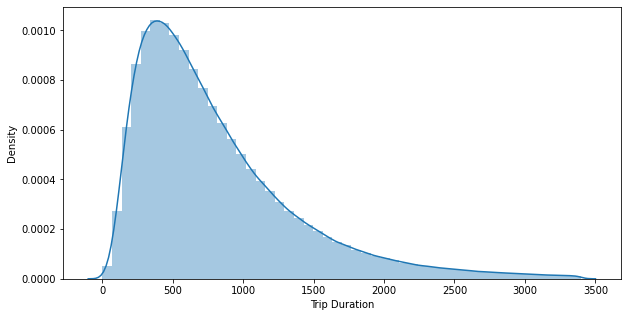

In [ ]:
plt.figure(figsize = (10,5))
sns.distplot(nyc_taxi['trip_duration'])
plt.xlabel('Trip Duration')
plt.show()

This histogram shows right skewness, hence let's apply the log10 to transform it to the normal distribution.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


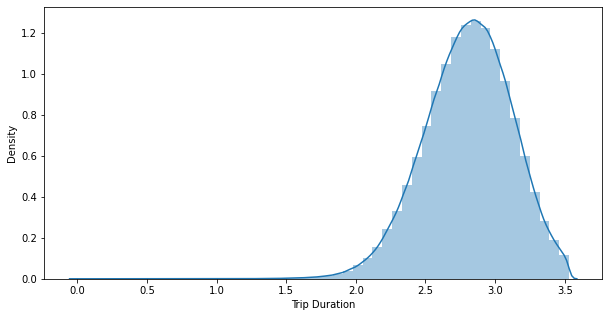

In [ ]:
plt.figure(figsize = (10,5))
sns.distplot(np.log10(nyc_taxi['trip_duration'])) #taking log of trip_duration
plt.xlabel('Trip Duration')
plt.show()

* Here, we can see that trip_duration is normally distributed.
* There are some outliers. Lets see the boxplot of this variable.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


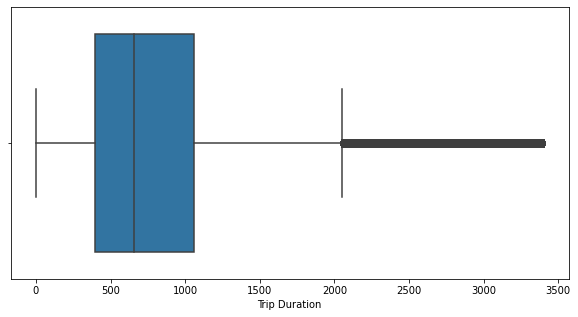

In [ ]:
plt.figure(figsize = (10,5))
sns.boxplot(nyc_taxi.trip_duration)
plt.xlabel('Trip Duration')
plt.show()

We can clearly see an outlier and should be removed for the data consistency.

Calclating 0-100th percentille to find a correct percentile value for removal of outliers.

The 90th percentile i.e. 1634 looks reasonable. But, 100th percentile i.e. 3526282 is outlier. Hence removing these would be a better idea.

Let's expand from 90th percentile to 100th percentile as to look further for the 99th percentile.

Let's visualize the number of trips taken in slabs of 0-10, 20-30 ... minutes respectively

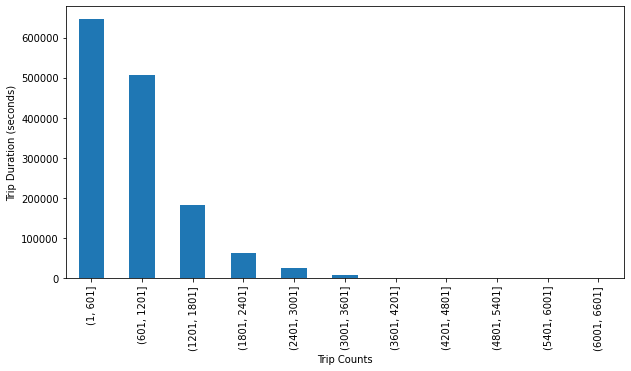

In [ ]:
plt.figure(figsize = (10,5))
nyc_taxi.trip_duration.groupby(pd.cut(nyc_taxi.trip_duration, np.arange(1,7200,600))).count().plot(kind='bar')
plt.xlabel('Trip Counts')
plt.ylabel('Trip Duration (seconds)')
plt.show()

Let's have a look at the 10 largest and smallest value of trip_duration.

We can see that major chunk (99th percentile) of trip duration is completed in 3440 seconds i.e. nearly 1 hour.

There are very few trip which have duration greater than 5000 seconds.

There are some durations with as low as 1 second. which points towards trips with 0 km distance.

We should get rid the outliers for the sake of data consistency. (Trip duration greater than 5000 seconds and also trip duration less than 30 seconds)

<b>Trips per Time of Day

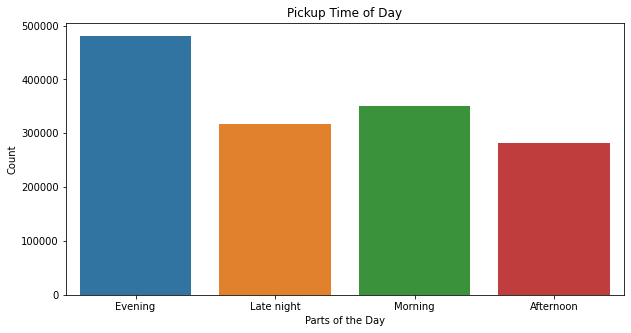

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(x="pickup_timeofday",data=nyc_taxi)
plt.title('Pickup Time of Day')
plt.xlabel('Parts of the Day')
plt.ylabel('Count')
plt.show()

As we saw above, evenings are the busiest.

<b>Vendor id

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


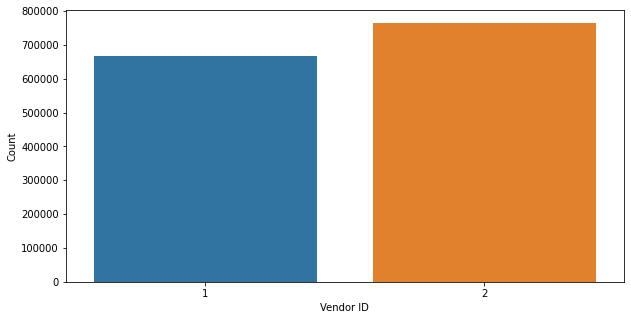

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(nyc_taxi.vendor_id)
plt.xlabel('Vendor ID')
plt.ylabel('Count')
plt.show()

We see that there is not much difference between the trips taken by both vendors.

<b>Passenger count

In [ ]:
no_of_passenger = nyc_taxi['passenger_count'].value_counts().reset_index()
no_of_passenger.rename(columns={'index':'no_of_passenger', 'passenger_count':'trip_counts'})
no_of_passenger

,index,passenger_count
0,1,1015288
1,2,206128
2,5,76735
3,3,58833
4,6,47401
5,4,27788
6,8,1


In [ ]:
nyc_taxi = nyc_taxi[nyc_taxi['passenger_count']<=7]

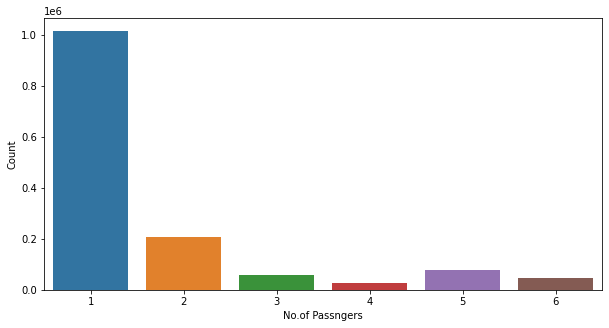

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(x='passenger_count',data=nyc_taxi)
plt.ylabel('Count')
plt.xlabel('No.of Passngers')
plt.show()

Let us remove the rows which have 0, 8 and 9 passenger count

* We see the highest amount of trips was taken by a single passenger.
* The instance of large group of people travelling together is rare.

<b>Store and Forward Flag

In [ ]:
nyc_taxi['store_and_fwd_flag'].value_counts(normalize=True)

N    0.994664
Y    0.005336
Name: store_and_fwd_flag, dtype: float64

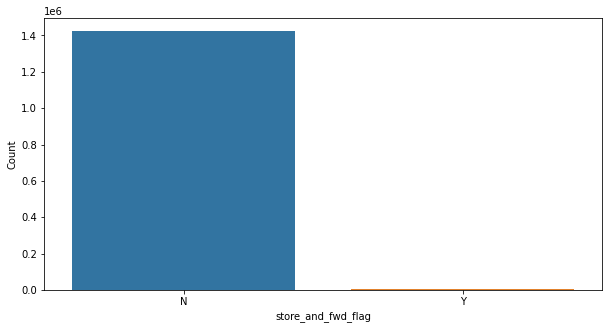

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(x='store_and_fwd_flag',data=nyc_taxi)
plt.ylabel('Count')
plt.xlabel('store_and_fwd_flag')
plt.show()

* We can see that only about 1% of the trip details were stored in the vehicle memory first before sending it to the server.

* This might have occured because of the GPS or mobile device battery was down when the trip finished.

<b>Distance

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


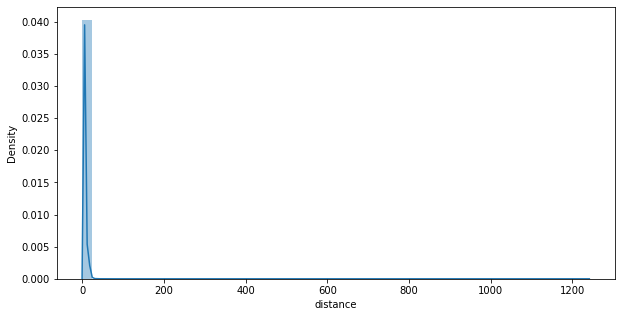

In [ ]:
plt.figure(figsize = (10,5))
sns.distplot(nyc_taxi['distance'])
plt.xlabel('distance')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


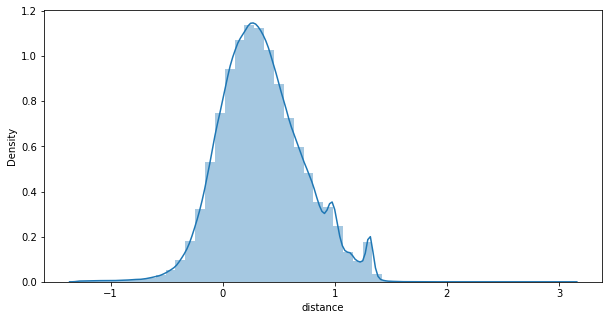

In [ ]:
plt.figure(figsize = (10,5))
sns.distplot(np.log10(nyc_taxi['distance']))
plt.xlabel('distance')
plt.show()

* There are some trips with over 100 km distance.
* Some of the trips with 0 km distance.

The possible reasons for 0 km trips can be:

* The dropoff location couldn’t be tracked.
* The driver deliberately took this ride to complete a target ride number.
* The passengers or driver cancelled the trip due to some issue.
* Due to some technical issue in software, etc.

<b>Speed

In [ ]:
nyc_taxi = nyc_taxi[nyc_taxi['speed']<=200]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


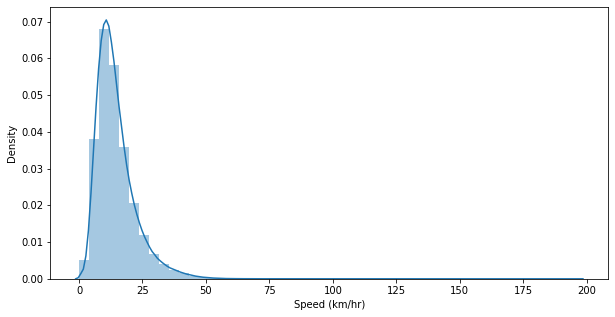

In [ ]:
plt.figure(figsize = (10,5))
sns.distplot(nyc_taxi['speed'])
plt.xlabel('Speed (km/hr)')
plt.show()

Let's plot the boxplot for better understanding.

There are trips that were done at a speed of over 100 km/h.

As per the rule in NYC, the speed limit is 25 mph(approx. 40km/h) in New York City unless another limit is posted. So having average speed of over 60km/h is quite unreasonable.

Let's take a look at the speed range ditribution with the help of graph.

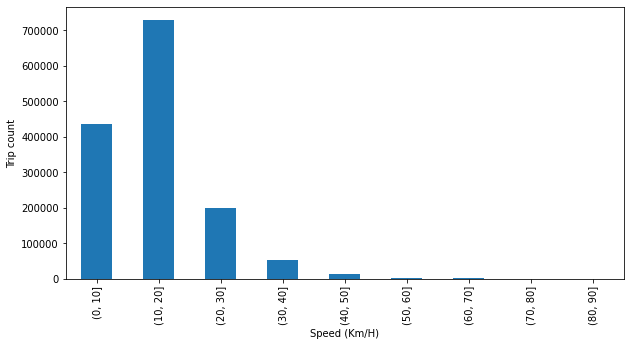

In [ ]:
plt.figure(figsize = (10,5))
nyc_taxi.speed.groupby(pd.cut(nyc_taxi.speed, np.arange(0,100,10))).count().plot(kind = 'bar')
plt.ylabel('Trip count')
plt.xlabel('Speed (Km/H)')
plt.show()

Mostly trips are done at a speed range of 10-20 km/h.

<b>Trips per hour

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


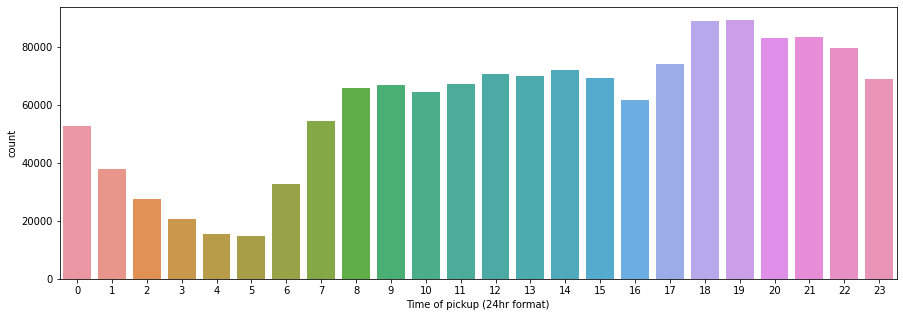

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(nyc_taxi.pickup_hour)
plt.xlabel('Time of pickup (24hr format)')
plt.show()

We see the busiest hours are 6:00 pm to 7:00 pm which makes sense as this is the time for people to return home from work.

<b>Trips per week day

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


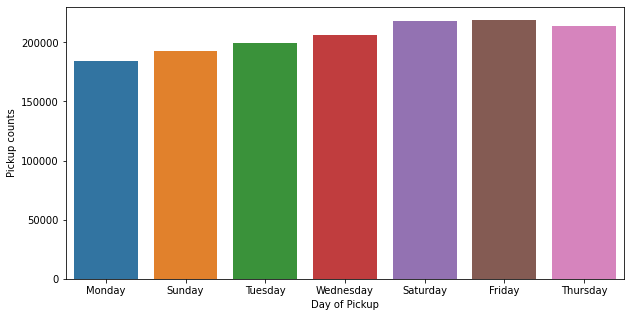

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(nyc_taxi.pickup_weekday)
plt.xlabel('Day of Pickup')
plt.ylabel('Pickup counts')
plt.show()

We see Fridays are the busiest days followed by Saturdays. That is probably because it’s weekend.

<b>Trips per month

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


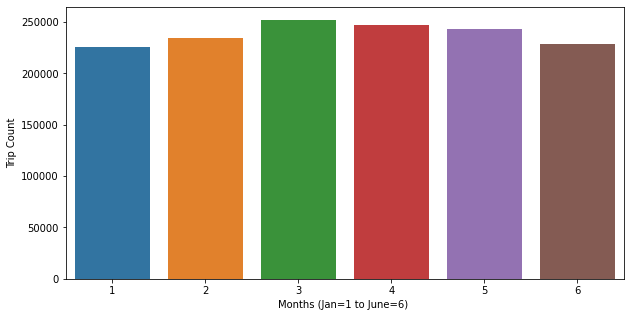

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(nyc_taxi.month)
plt.ylabel('Trip Count')
plt.xlabel('Months (Jan=1 to June=6) ')
plt.show()

There is not much difference in the number of trips across months.

#<b>Bivariate Analysis

Trip Duration per Vendor

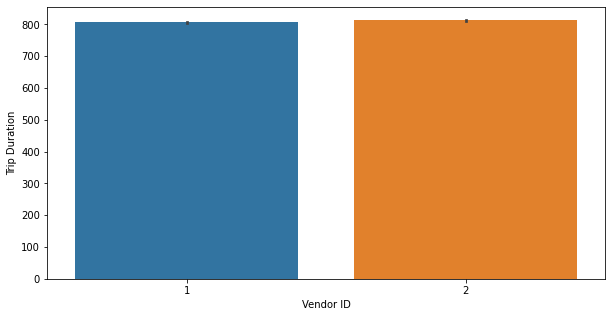

In [ ]:
plt.figure(figsize = (10,5))
sns.barplot(y='trip_duration',x='vendor_id',data=nyc_taxi,estimator=np.mean)
plt.xlabel('Vendor ID')
plt.ylabel('Trip Duration')
plt.show()

There is no difference beteen  vendor 1 and 2

<b>Trip Duration per Store and Forward Flagt

<Figure size 720x360 with 0 Axes>

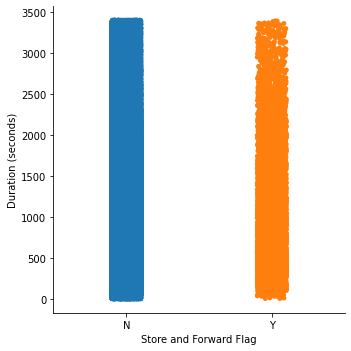

In [ ]:
plt.figure(figsize = (10,5))
sns.catplot(y='trip_duration',x='store_and_fwd_flag',data=nyc_taxi,kind='strip')
plt.xlabel('Store and Forward Flag')
plt.ylabel('Duration (seconds)')
plt.show()

There isn't much difference beteen N and Y i.e.stored flags.

<b>Trip Duration per hour

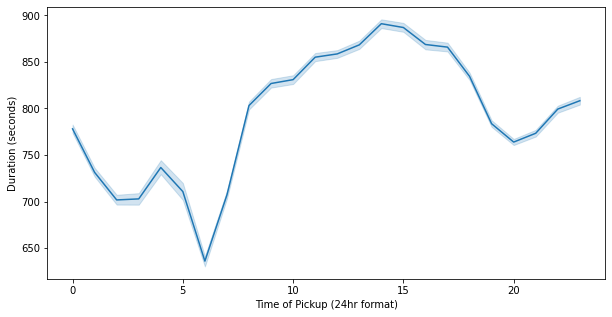

In [ ]:
plt.figure(figsize = (10,5))
sns.lineplot(x='pickup_hour',y='trip_duration',data=nyc_taxi)
plt.xlabel('Time of Pickup (24hr format)')
plt.ylabel('Duration (seconds)')
plt.show()

* We see the trip duration is the maximum around 3 pm which may be because of traffic on the roads.
* Trip duration is the lowest around 6 am as streets may not be busy.

<b>Trip duration per weekday

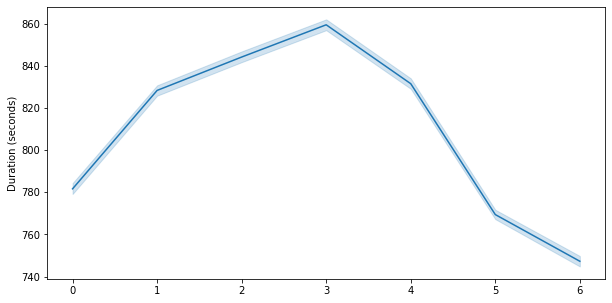

In [ ]:
plt.figure(figsize = (10,5))
sns.lineplot(x='pickup_weekday_num',y='trip_duration',data = nyc_taxi)
plt.ylabel('Duration (seconds)')
plt.xlabel('')
plt.show()

Trip duration on thursday is longest among all days.


<b>Trip duration per month

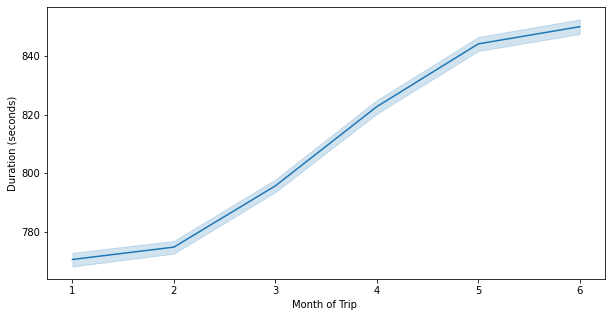

In [ ]:
plt.figure(figsize = (10,5))
sns.lineplot(x='month',y='trip_duration', data = nyc_taxi)
plt.ylabel('Duration (seconds)')
plt.xlabel('Month of Trip ')
plt.show()

* From February, we can see trip duration rising every month.
* There might be some seasonal parameters like wind/rain which can be a factor of this gradual increase in trip duration over a period.


<b>Distance and Hour

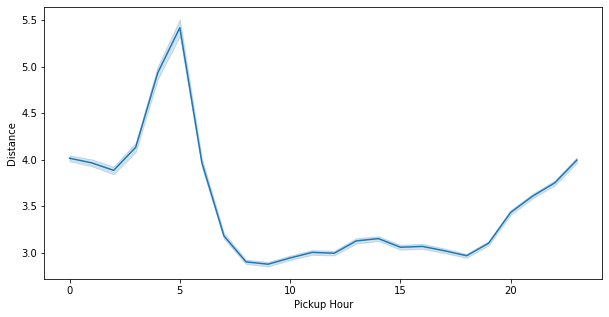

In [ ]:
plt.figure(figsize = (10,5))
sns.lineplot(y='distance',x='pickup_hour',data=nyc_taxi)
plt.ylabel('Distance')
plt.xlabel('Pickup Hour')
plt.show()

* Trip distance is highest during early morning hours.
* It is fairly equal from morning till the evening varying around 3 - 3.5 kms.
* It starts increasing gradually towards the late night hours starting from evening till 5 AM and decrease steeply towards morning.


<b>Distance and Trip Duration

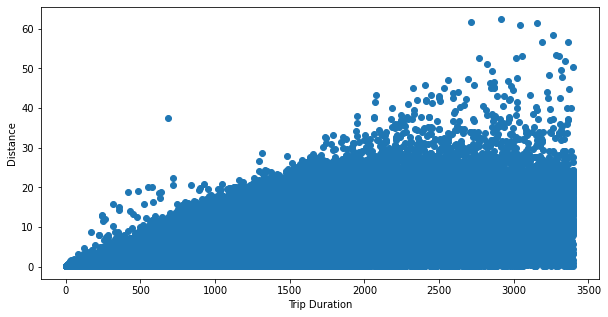

In [ ]:
plt.figure(figsize = (10,5))
plt.scatter(x='trip_duration', y='distance',data=nyc_taxi)
plt.ylabel('Distance')
plt.xlabel('Trip Duration')
plt.show()

Initially there is some proper correlation between the distance covered and the trip duration in the graph, but later on it seems a little uncorrelated.

We should remove those trips which covered 0 km distance.

The straight line shows some linear relation between the two.

In [ ]:
corr_df = nyc_taxi[list(set(nyc_taxi.columns.tolist()) - {'trip_duration'})]
corr_df.head()

,store_and_fwd_flag,id,distance,pickup_weekday,pickup_weekday_num,dropoff_weekday,pickup_hour,dropoff_latitude,dropoff_longitude,pickup_longitude,pickup_datetime,pickup_latitude,passenger_count,vendor_id,speed,month,dropoff_datetime,pickup_timeofday
0,N,id2875421,1.498523,Monday,0,Monday,17,40.765602,-73.964630,-73.982155,2016-03-14 17:24:55,40.767937,1,2,11.856445,3,2016-03-14 17:32:30,Evening
1,N,id2377394,1.805510,Sunday,6,Sunday,0,40.731152,-73.999481,-73.980415,2016-06-12 00:43:35,40.738564,1,1,9.803673,6,2016-06-12 00:54:38,Late night
2,N,id3858529,6.385108,Tuesday,1,Tuesday,11,40.710087,-74.005333,-73.979027,2016-01-19 11:35:24,40.763939,1,2,10.822216,1,2016-01-19 12:10:48,Morning
3,N,id3504673,1.485501,Wednesday,2,Wednesday,19,40.706718,-74.012268,-74.010040,2016-04-06 19:32:31,40.719971,1,2,12.465739,4,2016-04-06 19:39:40,Evening
4,N,id2181028,1.188590,Saturday,5,Saturday,13,40.782520,-73.972923,-73.973053,2016-03-26 13:30:55,40.793209,1,2,9.836608,3,2016-03-26 13:38:10,Afternoon


#<b>Correlation Analysis

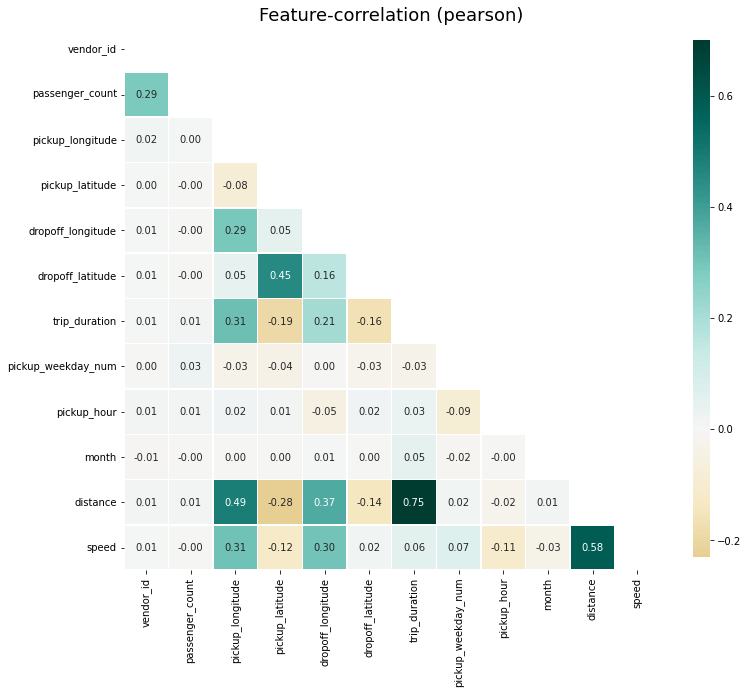

In [ ]:
klib.corr_plot(nyc_taxi)

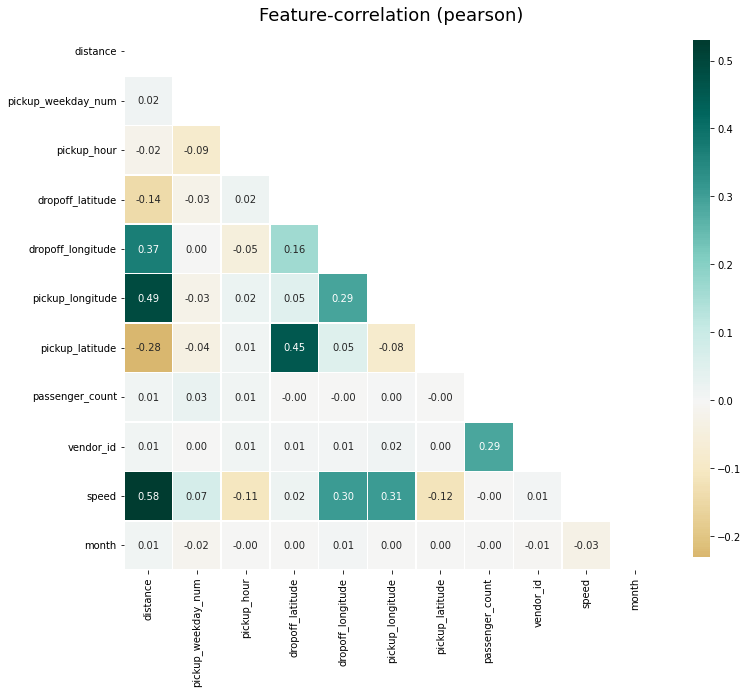

In [ ]:
klib.corr_plot(corr_df)

#<b>Feature Engineering

**One Hot Encoding**

Dummify features like 'store_and_fwd_flag', and 'pickup_weekday'.

In [ ]:
nyc_taxi.head(2)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_weekday,dropoff_weekday,pickup_weekday_num,pickup_hour,month,distance,speed,pickup_timeofday
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday,0,17,3,1.498523,11.856445,Evening
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday,6,0,6,1.805510,9.803673,Late night


In [ ]:
nyc_taxi.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_weekday', 'dropoff_weekday',
       'pickup_weekday_num', 'pickup_hour', 'month', 'distance', 'speed',
       'pickup_timeofday'],
      dtype='object')

In [ ]:
nyc_taxi.head(2)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_weekday,dropoff_weekday,pickup_weekday_num,pickup_hour,month,distance,speed,pickup_timeofday
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday,0,17,3,1.498523,11.856445,Evening
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday,6,0,6,1.805510,9.803673,Late night


In [ ]:
independent_variables = ['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'distance']
dependent_variable = 'trip_duration'

In [ ]:
# Create the data of independent variables
X = nyc_taxi[independent_variables].values

# Create the dependent variable data
y = nyc_taxi[dependent_variable].values

In [ ]:
print(X.shape)
print(y.shape)

(1432106, 5)
(1432106,)


In [ ]:
X[0:2]

array([[  2.        ,   1.        , -73.98215485,  40.76793671,
          1.4985229 ],
       [  1.        ,   1.        , -73.98041534,  40.73856354,
          1.80550972]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Transforming data
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [ ]:
X[0:2]

array([[1.        , 0.        , 0.39762385, 0.85455865, 0.02324102],
       [0.        , 0.        , 0.39817308, 0.84995938, 0.02816653]])

#<b>Splitting the data in train and test sets

In [ ]:
#Importing RFE and Linear Regression 
from sklearn.model_selection import train_test_split

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Splited the selected data set in 80-20 split for training and testing purpose respectively

In [ ]:
print('Train Data Shape')
print(X_train.shape)
print(y_train.shape)
print('\n')
print('Test Data Shape')
print(X_test.shape)
print(y_test.shape)

Train Data Shape
(1145684, 5)
(1145684,)


Test Data Shape
(286422, 5)
(286422,)


In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#<b>Linear Regression

In [ ]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
linear_reg =  LinearRegression()

#Aplly model on train dataset
linear_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
#model score on train dataset
linear_reg.score(X_train, y_train)

0.568058599435634

In [ ]:
#predicted value of train and test dataset
y_pred_train = linear_reg.predict(X_train)
y_pred_test = linear_reg.predict(X_test)

In [ ]:
#Train Data Evaluation Metrics 
lr_train_mse  = mean_squared_error((y_train), (y_pred_train))
print("Train MSE :" , lr_train_mse)

lr_train_r2 = r2_score((y_train), (y_pred_train))
print("Train R2 :" ,lr_train_r2) 

lr_train_r2_ = 1-(1-r2_score((y_train), (y_pred_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Train Adjusted R2 : ",lr_train_r2_)

Train MSE : 141482.04660757192
Train R2 : 0.568058599435634
Train Adjusted R2 :  0.5680567143448817


In [ ]:
lr_test_mse  = mean_squared_error((y_test), (y_pred_test))
print("Test MSE :" , lr_test_mse)

lr_test_r2 = r2_score((y_test), (y_pred_test))
print("Test R2 :" ,lr_test_r2)

lr_test_r2_ = 1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Test Adjusted R2 : ",lr_test_r2_)

Test MSE : 140908.44105524203
Test R2 : 0.5680826793476985
Test Adjusted R2 :  0.5680751393129125


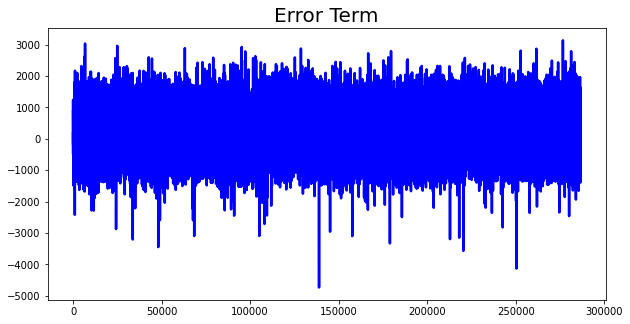

In [ ]:
plt.figure(figsize= (10,5))
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test-y_pred_test, color='blue', linewidth=2.5, linestyle='-')
plt.title('Error Term', fontsize=20)
plt.show()

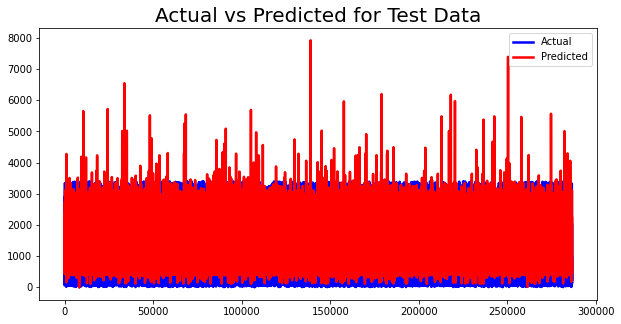

In [ ]:
#Actual vs Prediction
plt.figure(figsize= (10,5))
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test, color='blue', linewidth=2.5, linestyle='-')
plt.plot(c, y_pred_test, color='red', linewidth=2.5, linestyle='-')
plt.title('Actual vs Predicted for Test Data', fontsize=20)
plt.legend(["Actual", "Predicted"])
plt.show()

As we can clearly see the Linear regression model does not provide us with high accuracy. It has high prediction error on the metrics we tested.

#<b>Running Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
#Cross validation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='r2', cv=5)

In [ ]:
lasso_regressor.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.998e+09, tolerance: 3.007e+07
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.639e+10, tolerance: 2.998e+07
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='r2')

In [ ]:
print('The best fit alpha value is found out to be :', lasso_regressor.best_params_)
print('The R2 score using the same alpha is :', lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0001}
The R2 score using the same alpha is : 0.5680459819846767


**The best parameters for the LASSO Regression which we already tested before to save time when running it again.**
* The best fit alpha value is found out to be : {'alpha': 0.0001}

In [ ]:
lasso_regressor.score(X_train, y_train)

0.5680585970779729

In [ ]:
y_pred_lasso_train = lasso_regressor.predict(X_train)
y_pred_lasso_test = lasso_regressor.predict(X_test)

#<b>Model Evaluation

In [ ]:
lasso_train_mse  = mean_squared_error(y_train, y_pred_lasso_train)
print("Train MSE :" , lasso_train_mse)

lasso_train_r2 = r2_score(y_train, y_pred_lasso_train)
print("Train R2 :" ,lasso_train_r2)

lasso_train_r2_= 1-(1-r2_score(y_train, y_pred_lasso_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Train Adjusted R2 : ", lasso_train_r2)

Train MSE : 141482.0473798218
Train R2 : 0.5680585970779729
Train Adjusted R2 :  0.5680585970779729


In [ ]:
lasso_test_mse  = mean_squared_error(y_test, y_pred_lasso_test)
print("Test MSE :" , lasso_test_mse)

lasso_test_r2 = r2_score(y_test, y_pred_lasso_test)
print("Test R2 :" ,lasso_test_r2)

lasso_test_r2_= 1-(1-r2_score(y_test, y_pred_lasso_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Test Adjusted R2 : ", lasso_test_r2_)

Test MSE : 140908.29288825937
Test R2 : 0.5680831335141464
Test Adjusted R2 :  0.5680755934872889


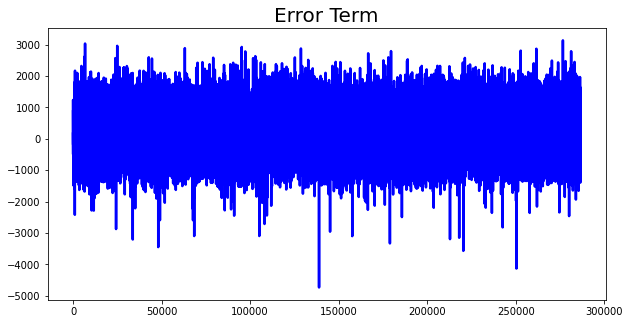

In [ ]:
plt.figure(figsize= (10,5))
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test-y_pred_lasso_test, color='blue', linewidth=2.5, linestyle='-')
plt.title('Error Term', fontsize=20)
plt.show()

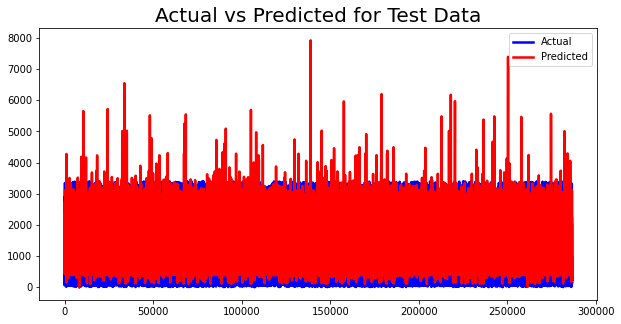

In [ ]:
#Actual vs Prediction
plt.figure(figsize= (10,5))
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test, color='blue', linewidth=2.5, linestyle='-')
plt.plot(c, y_pred_lasso_test, color='red', linewidth=2.5, linestyle='-')
plt.title('Actual vs Predicted for Test Data', fontsize=20)
plt.legend(["Actual", "Predicted"])
plt.show()

The Lasso regresion model doesn't improve on the Linear model either.

#<b>Running Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
#Cross validation
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='r2', cv=5)
ridge_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='r2')

In [ ]:
print('The best fit alpha value is found out to be :' ,ridge_regressor.best_params_)
print('The R2 score using the same alpha is :', ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}
The R2 score using the same alpha is : 0.5680459822803252


**The best parameters for the RIDGE Regression which we already tested before to save time when running it again.**
* The best fit alpha value is found out to be : {'alpha': 0.01}

In [ ]:
ridge_regressor.score(X_train, y_train)

0.5680585992087899

In [ ]:
y_pred_ridge_train=ridge_regressor.predict(X_train)
y_pred_ridge_test = ridge_regressor.predict(X_test)

#<b>Model Evaluation

In [ ]:
ridge_train_mse  = mean_squared_error(y_train, y_pred_ridge_train)
print("Train MSE :" , ridge_train_mse)

ridge_train_r2 = r2_score(y_train, y_pred_ridge_train)
print("Train R2 :" ,ridge_train_r2)

ridge_train_r2_= 1-(1-r2_score(y_train, y_pred_ridge_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Train Adjusted R2 : ", ridge_train_r2)

Train MSE : 141482.04668187446
Train R2 : 0.5680585992087899
Train Adjusted R2 :  0.5680585992087899


In [ ]:
ridge_test_mse  = mean_squared_error(y_test, y_pred_ridge_test)
print("Test MSE :" , ridge_test_mse)

ridge_test_r2 = r2_score(y_test, y_pred_ridge_test)
print("Test R2 :" ,ridge_test_r2)

ridge_test_r2_= 1-(1-r2_score(y_test, y_pred_ridge_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Test Adjusted R2 : ", ridge_test_r2_)

Test MSE : 140908.39380010887
Test R2 : 0.5680828241957312
Test Adjusted R2 :  0.5680752841634739


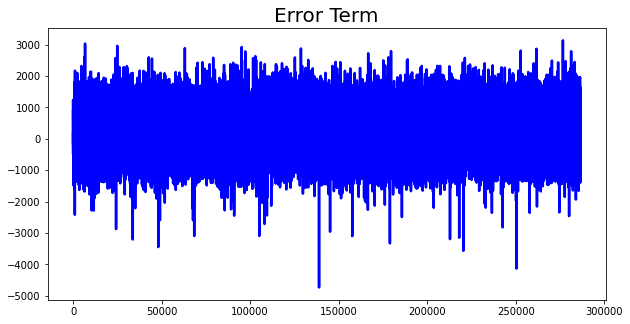

In [ ]:
plt.figure(figsize= (10,5))
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test-y_pred_ridge_test, color='blue', linewidth=2.5, linestyle='-')
plt.title('Error Term', fontsize=20)
plt.show()

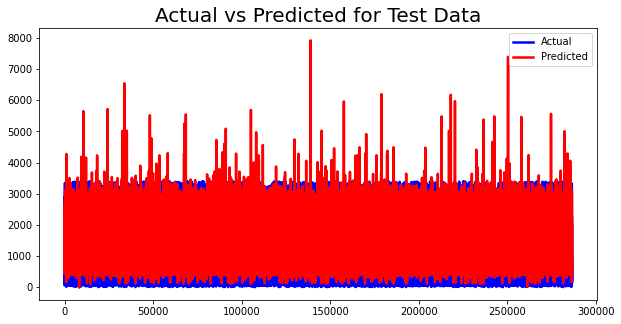

In [ ]:
#Actual vs Prediction
plt.figure(figsize= (10,5))
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test, color='blue', linewidth=2.5, linestyle='-')
plt.plot(c, y_pred_ridge_test, color='red', linewidth=2.5, linestyle='-')
plt.title('Actual vs Predicted for Test Data', fontsize=20)
plt.legend(["Actual", "Predicted"])
plt.show()

The Ridge regresion model doesn't improve on the Linear model either.

#<b>Running Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Maximum depth of trees
max_depth = [4,6,8,10]

# Minimum number of samples required to split a node
min_samples_split = [10,20,30]

# Minimum number of samples required at each leaf node
min_samples_leaf = [8,16,22]

# Hyperparameter Grid
param_dict_dt = {'max_depth' : max_depth,'min_samples_split' : min_samples_split,'min_samples_leaf' : min_samples_leaf}

In [ ]:
dt = DecisionTreeRegressor()

# Grid search
dt_grid = GridSearchCV(estimator=dt, param_grid = param_dict_dt, cv = 5, verbose=2, scoring='r2')

dt_grid.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=4, min_samples_leaf=8, min_samples_split=10; total time=   2.1s
[CV] END max_depth=4, min_samples_leaf=8, min_samples_split=10; total time=   2.1s
[CV] END max_depth=4, min_samples_leaf=8, min_samples_split=10; total time=   2.1s
[CV] END max_depth=4, min_samples_leaf=8, min_samples_split=10; total time=   2.1s
[CV] END max_depth=4, min_samples_leaf=8, min_samples_split=10; total time=   2.1s
[CV] END max_depth=4, min_samples_leaf=8, min_samples_split=20; total time=   2.1s
[CV] END max_depth=4, min_samples_leaf=8, min_samples_split=20; total time=   2.0s
[CV] END max_depth=4, min_samples_leaf=8, min_samples_split=20; total time=   2.0s
[CV] END max_depth=4, min_samples_leaf=8, min_samples_split=20; total time=   2.1s
[CV] END max_depth=4, min_samples_leaf=8, min_samples_split=20; total time=   2.1s
[CV] END max_depth=4, min_samples_leaf=8, min_samples_split=30; total time=   2.1s
[CV] END max_depth=4, min

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [4, 6, 8, 10],
                         'min_samples_leaf': [8, 16, 22],
                         'min_samples_split': [10, 20, 30]},
             scoring='r2', verbose=2)

In [ ]:
print('The best fit alpha value is found out to be :' ,dt_grid.best_params_)
print('The R2 score using the same alpha is :', dt_grid.best_score_)

The best fit alpha value is found out to be : {'max_depth': 10, 'min_samples_leaf': 22, 'min_samples_split': 30}
The R2 score using the same alpha is : 0.6418407705827494


**The best parameters for the Decision Tree Regression which we already tested before to save time when running it again.**
* {'max_depth': 10, 'min_samples_leaf': 22, 'min_samples_split': 30}

In [ ]:
y_pred_dt_train=dt_grid.predict(X_train)
y_pred_dt_test=dt_grid.predict(X_test)

#<b>Model Evaluation

In [ ]:
dt_train_mse  = mean_squared_error(y_train, y_pred_dt_train)
print("Train MSE :" , dt_train_mse)

dt_train_r2 = r2_score(y_train, y_pred_dt_train)
print("Train R2 :" ,dt_train_r2)

dt_train_r2_= 1-(1-r2_score(y_train, y_pred_dt_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Train Adjusted R2 : ", dt_train_r2_)

Train MSE : 115736.72752800421
Train R2 : 0.6466584603215155
Train Adjusted R2 :  0.6466569182584765


In [ ]:
dt_test_mse  = mean_squared_error(y_test, y_pred_dt_test)
print("Test MSE :" , dt_test_mse)

dt_test_r2 = r2_score(y_test, y_pred_dt_test)
print("Test R2 :" ,dt_test_r2)

dt_test_r2_= 1-(1-r2_score(y_test, y_pred_dt_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Test Adjusted R2 : ", dt_test_r2_)

Test MSE : 116277.77634467768
Test R2 : 0.6435814261083801
Test Adjusted R2 :  0.6435752040646763


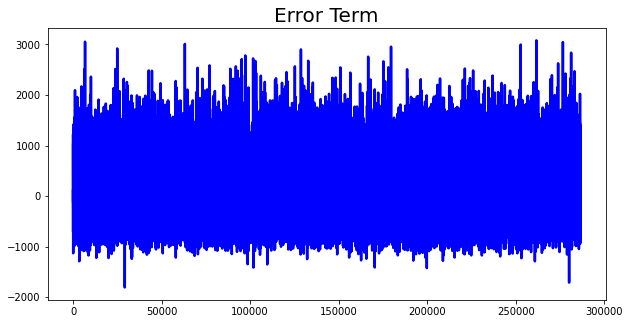

In [ ]:
plt.figure(figsize= (10,5))
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test-y_pred_dt_test, color='blue', linewidth=2.5, linestyle='-')
plt.title('Error Term', fontsize=20)
plt.show()

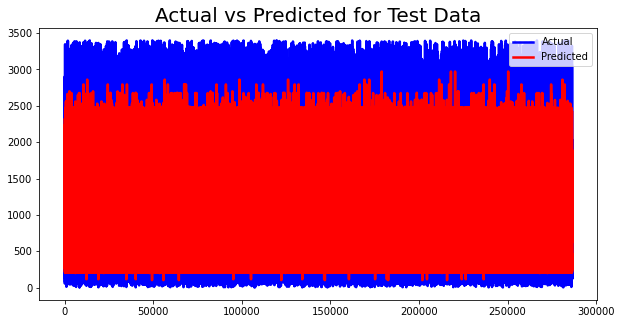

In [ ]:
#Actual vs Prediction
plt.figure(figsize= (10,5))
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test, color='blue', linewidth=2.5, linestyle='-')
plt.plot(c, y_pred_dt_test, color='red', linewidth=2.5, linestyle='-')
plt.title('Actual vs Predicted for Test Data', fontsize=20)
plt.legend(["Actual", "Predicted"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


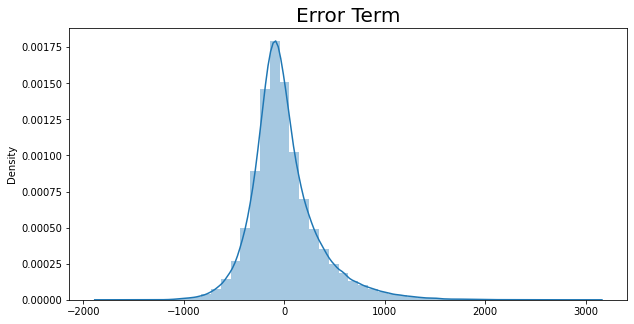

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(y_test - y_pred_dt_test )
plt.title('Error Term', fontsize=20)
plt.show()

The decision tree with the selected hyperparameters does improve the predictions of the model considerably. It still isn't ideal but it is certainly much better than Linear models.

#<b>Random Forest 

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Hyperparameter tuning

# Create the parameter grid based on the results of random search 
#param_grid = {'n_estimators': [20]}
              #,'min_samples_leaf': [3, 4, 5],'max_features': [2, 3],'min_samples_split': [8, 10, 12]}
# Create a based model
forest_reg = RandomForestRegressor(n_estimators=50, n_jobs = -5, verbose = 1,)

# Instantiate the grid search model
#forest_reg = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 4, n_jobs = -1, verbose = 2, )

In [ ]:
# Fit the object to train dataset
forest_reg.fit(X_train, y_train)

[Parallel(n_jobs=-5)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-5)]: Done  50 out of  50 | elapsed:  7.4min finished


RandomForestRegressor(n_estimators=50, n_jobs=-5, verbose=1)

In [ ]:
#print('The best fit alpha value is found out to be :' ,forest_reg.best_params_)
print('The R2 score using the same alpha is :',forest_reg.best_score_)

**The best parameters for the Random Forest which we already tested before to save time when running it again.**
* {'learning_rate': 0.2, 'max_depth': 8, 'min_samples_': 40, 'n_estimators': 200}

In [ ]:
y_pred_forest_train = forest_reg.predict(X_train)
y_pred_forest_test = forest_reg.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   59.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   14.7s finished


#<b>Model Evaluation

In [ ]:
forest_train_mse  = mean_squared_error(y_train, y_pred_forest_train)
print("Train MSE :" , forest_train_mse)

forest_train_r2 = r2_score(y_train, y_pred_forest_train)
print("Train R2 :" ,forest_train_r2)

forest_train_r2_= 1-(1-r2_score((y_train), (y_pred_forest_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Train Adjusted R2 : ",forest_train_r2_)

Train MSE : 19849.400300944686
Train R2 : 0.9394002421371961
Train Adjusted R2 :  0.9393999776660363


In [ ]:
forest_test_mse  = mean_squared_error(y_test, y_pred_forest_test)
print("Test MSE :" , forest_test_mse)

forest_test_r2 = r2_score(y_test, y_pred_forest_test)
print("Test R2 :" ,forest_test_r2)

forest_test_r2_= 1-(1-r2_score((y_test), (y_pred_forest_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Test Adjusted R2 : ", forest_test_r2_)

Test MSE : 125347.95215581382
Test R2 : 0.6157792163553435
Test Adjusted R2 :  0.6157725089649805


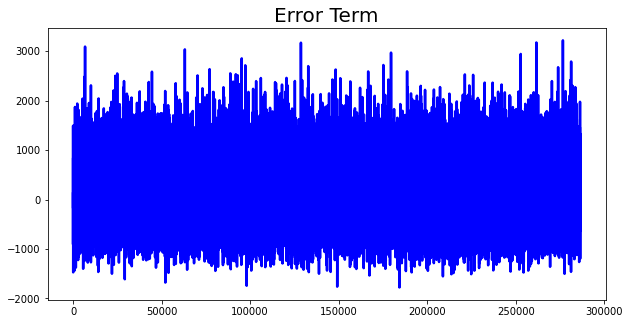

In [ ]:
plt.figure(figsize= (10,5))
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test-y_pred_forest_test, color='blue', linewidth=2.5, linestyle='-')
plt.title('Error Term', fontsize=20)
plt.show()

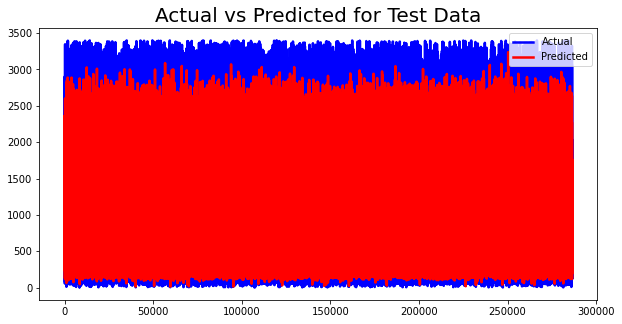

In [ ]:
#Actual vs Prediction
plt.figure(figsize= (10,5))
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test, color='blue', linewidth=2.5, linestyle='-')
plt.plot(c, y_pred_forest_test, color='red', linewidth=2.5, linestyle='-')
plt.title('Actual vs Predicted for Test Data', fontsize=20)
plt.legend(["Actual", "Predicted"])
plt.show()

In [ ]:
independent_variables = ['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'distance']
dependent_variable = 'trip_duration'

In [ ]:
X.

In [ ]:
features = X_train.columns
importances = classifier.best_estimator_.feature_importances_
indices = np.argsort(importances)

In [ ]:
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

In [ ]:
importance_df= pd.DataFrame({'Features': independent_variables, 'Feature_importance': list(forest_reg.best_estimator_.feature_importances_)})
importance_df

AttributeError: ignored

In [ ]:
importance_df.sort_values(by=['Feature_importance'],ascending=False,inplace=True)

Let's look it by using bar grabh.

In [ ]:
plt.figure(figsize=(15,6))
plt.title('Feature Importance', fontsize=20)
sns.barplot(x='Features',y="Feature_importance", data=importance_df[:6])
plt.show()

In [ ]:
#Plotting the error terms to understand the distribution.
plt.figure(figsize=(10,5))
sns.distplot(y_test - y_pred_xgb_test )
plt.title('Error Term', fontsize=20)
plt.show()

#<b>Running XGBoost Regressor

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

In [ ]:
xgb_model = xgb.XGBRegressor()
grid_values = {'n_estimators' : [80,150,200], 'max_depth': [5,8,10],'min_samples_' : [40,50],'learning_rate' : [0.2,0.4,0.6]}
#grid_values = {'n_estimators' : [200], 'max_depth': [8], 'min_samples_' : [40],'learning_rate' : [0.2]}
xgb_model = GridSearchCV(xgb_model, param_grid = grid_values,scoring = 'r2', cv=5,verbose=1,)

In [ ]:
#xgb_model.fit(X_train,y_train)

In [ ]:
print('The best fit alpha value is found out to be :' ,xgb_model.best_params_)
print('The R2 score using the same alpha is :', xgb_model.best_score_)

**The best parameters for the XGBoost which we already tested before to save time when running it again.**
* {'learning_rate': 0.2, 'max_depth': 8, 'min_samples_': 40, 'n_estimators': 200}

In [ ]:
xgb_model.best_params_

{'max_depth': 8, 'n_estimators': 2}

In [ ]:
xgb_model.best_score_

-11.907239147712023

In [ ]:
y_pred_xgb_train=xgb_model.predict(X_train)
y_pred_xgb_test=xgb_model.predict(X_test)

#<b>Model Evaluation

In [ ]:
xgb_train_mse  = mean_squared_error(y_train, y_pred_xgb_train)
print("Train MSE :" , xgb_train_mse)

xgb_train_r2 = r2_score(y_train, y_pred_xgb_train)
print("Train R2 :" ,xgb_train_r2)

xgb_train_r2_= 1-(1-r2_score((y_train), (y_pred_xgb_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Train Adjusted R2 : ", xgb_train_r2_)

Train MSE : 0.5955215467842543
Train RMSE : 0.7717004255436525
Train R2 : -4.854247028428633
Train Adjusted R2 :  -4.85432285215525


In [ ]:
xgb_test_mse  = mean_squared_error(y_test, y_pred_xgb_test)
print("Test MSE :" , xgb_test_mse)

xgb_test_r2 = r2_score(y_test, y_pred_xgb_test)
print("Test R2 :" ,xgb_test_r2)

xgb_test_r2_= 1-(1-r2_score((y_test), (y_pred_xgb_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Test Adjusted R2 : ", xgb_test_r2_)

Test MSE : 0.5942387594757909
Test RMSE : 0.7708688341577903
Test R2 : -4.841597836024708
Test Adjusted R2 :  -4.841824822010449


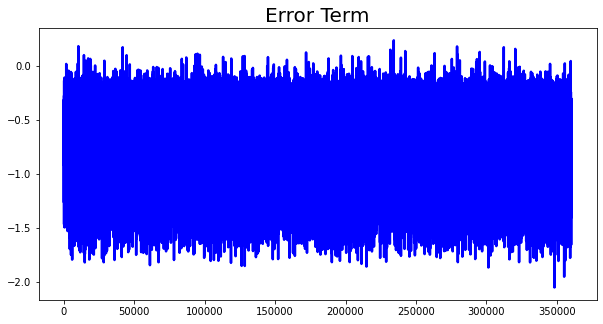

In [ ]:
plt.figure(figsize= (10,5))
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test-y_pred_xgb_test, color='blue', linewidth=2.5, linestyle='-')
plt.title('Error Term', fontsize=20)
plt.show()

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


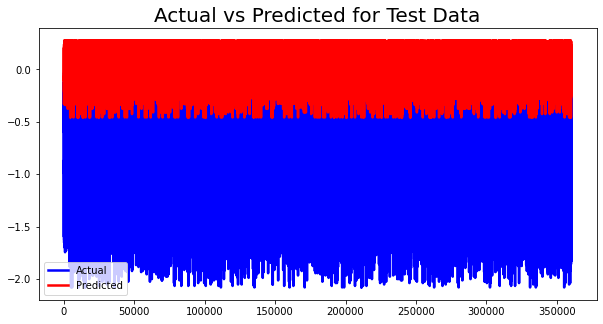

In [ ]:
#Actual vs Prediction
plt.figure(figsize= (10,5))
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test, color='blue', linewidth=2.5, linestyle='-')
plt.plot(c, y_pred_xgb_test, color='red', linewidth=2.5, linestyle='-')
plt.title('Actual vs Predicted for Test Data', fontsize=20)
plt.legend(["Actual", "Predicted"])
plt.show()

Finally, let's also look the feature importance.

In [ ]:
importance_df= pd.DataFrame({'Features': features, 'Feature_importance': list(xgb_model.best_estimator_.feature_importances_)})
importance_df

,Features,Feature_importance
0,passenger_count,0.000354
1,pickup_longitude,0.003574
2,pickup_latitude,0.001965
3,dropoff_longitude,0.002352
4,dropoff_latitude,0.034139
5,pickup_hour,0.037738
6,month,0.001065
7,distance,0.879231
8,pickup_weekday_Monday,0.006282
9,pickup_weekday_Saturday,0.013846


In [ ]:
importance_df.sort_values(by=['Feature_importance'],ascending=False,inplace=True)

Let's look it by using bar grabh.

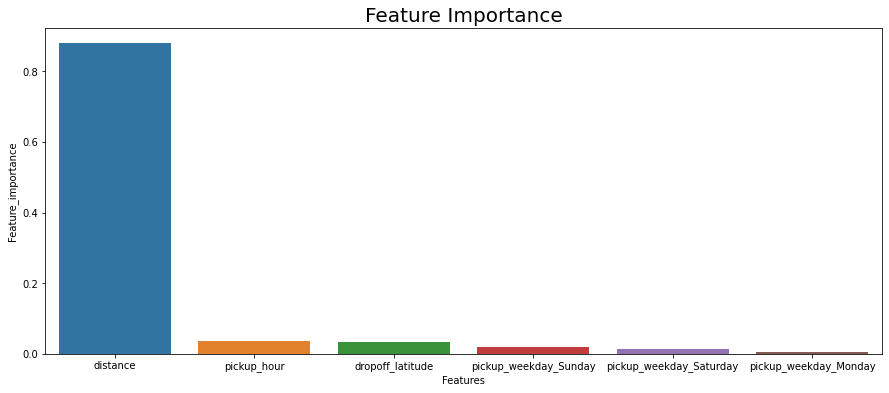

In [ ]:
plt.figure(figsize=(15,6))
plt.title('Feature Importance', fontsize=20)
sns.barplot(x='Features',y="Feature_importance", data=importance_df[:6])
plt.show()

Clearly, we can see distance is the top contributor to trip duration followed by different days of the weeks.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


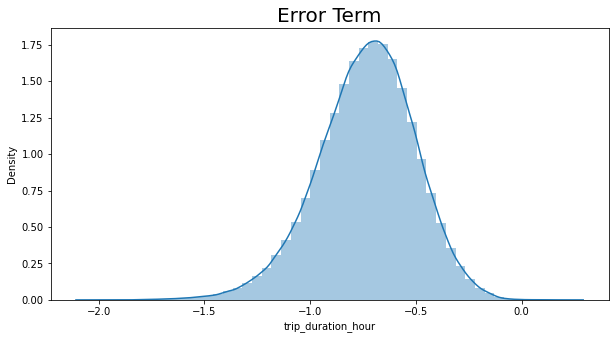

In [ ]:
#Plotting the error terms to understand the distribution.
plt.figure(figsize=(10,5))
sns.distplot(y_test - y_pred_xgb_test )
plt.title('Error Term', fontsize=20)
plt.show()

#<b>Evaluating the models
Models Summary for the Train data.

In [ ]:
models= ['Linear Regression', 'Lasso Regression', 'Ridge Regression','DecisionTree Regressor','XGBoost Regressor']
train_mse= [lr_train_mse, lasso_train_mse, ridge_train_mse, dt_train_mse, xgb_train_mse]
train_r2= [lr_train_r2, lasso_train_r2, ridge_train_r2, dt_train_r2, xgb_train_r2]
train_adjusted_r2= [lr_train_r2_, lasso_train_r2_, ridge_train_r2_, dt_train_r2_, xgb_train_r2_]

<b>Models Summary for the test data.

In [ ]:
models= ['Linear Regression', 'Lasso Regression', 'Ridge Regression','DecisionTree Regressor','XGBoost Regressor']
test_mse= [lr_test_mse, lasso_test_mse, ridge_test_mse, dt_test_mse, xgb_test_mse]
test_r2= [lr_test_r2, lasso_test_r2, ridge_test_r2, dt_test_r2, xgb_test_r2]
test_adjusted_r2= [lr_test_r2_, lasso_test_r2_, ridge_test_r2_, dt_test_r2_, xgb_test_r2_]

In [ ]:
Train_data_df=pd.DataFrame({'Model Name': models, 'Train MSE': train_mse, 'Train R^2': train_r2, 
                            'Train Adjusted R^2': train_adjusted_r2})
Train_data_df

In [ ]:
Test_data_df= pd.DataFrame({'Model Name': models, 'Test MSE': test_mse, 'Test R^2': test_r2, 
                            'Test Adjusted R^2': test_adjusted_r2})
Test_data_df

#**Conclusion**
* We can see that MSE and RMSE which are the metrics used to evaluate the performance of regression model of **Decision Tree** and **XGBoost Regressor** is not varying much during traing and testing time. Also the R^2 is about same during training and Testing time.
* The Linear models don't show good performance on our training and testing environment.
* From above table we can conclude that **XGBoost Regressor** is the best models as compare to the other models to predict the trip duration for a particular taxi.